In [1]:
%run Global.ipynb

In [2]:
train_df_ohe_selected = pd.read_csv(DATASET_DIR + "train_df.csv", keep_default_na=False)

X = train_df_ohe_selected.iloc[:,:-1] # (transformed) attributes
y = train_df_ohe_selected.iloc[:,-1]  # ground truth labels

In [3]:
# run in terminal: python -m pip install mlxtend
# https://rasbt.github.io/mlxtend/user_guide/classifier/StackingCVClassifier/#example-3-stacked-cv-classification-and-gridsearch
import mlxtend
from mlxtend.classifier import StackingCVClassifier

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm

## StackingClf1 - 3 Base Classifiers

In [5]:
mnb = MultinomialNB()
linearSVM = svm.LinearSVC(random_state=30027)
logr = LogisticRegression(solver='sag', max_iter=50, random_state = 30027)

In [6]:
# tune hyperparameters
param_grid = {'linearsvc__C': [1,5], 'multinomialnb__alpha': [0.5, 1], 'logisticregression__C': [1]}
sclf3 = StackingCVClassifier(classifiers=[mnb, linearSVM, logr], 
                            meta_classifier=CategoricalNB(),
                            cv = 2,
                            random_state=30027)
sclf3.meta_classifier = CategoricalNB()
grid = tune_hyperparameter(sclf3, param_grid, X, y, cv=2)
print(max(grid['mean_test_accuracy']))
grid.loc[grid['mean_test_accuracy'] == max(grid['mean_test_accuracy'])]['params'].values

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END linearsvc__C=1, logisticregression__C=1, multinomialnb__alpha=0.5; total time=  12.9s
[CV] END linearsvc__C=1, logisticregression__C=1, multinomialnb__alpha=0.5; total time=  13.8s
[CV] END linearsvc__C=1, logisticregression__C=1, multinomialnb__alpha=1; total time=  12.4s
[CV] END linearsvc__C=1, logisticregression__C=1, multinomialnb__alpha=1; total time=  12.7s
[CV] END linearsvc__C=5, logisticregression__C=1, multinomialnb__alpha=0.5; total time=  14.3s
[CV] END linearsvc__C=5, logisticregression__C=1, multinomialnb__alpha=0.5; total time=  14.0s
[CV] END linearsvc__C=5, logisticregression__C=1, multinomialnb__alpha=1; total time=  13.8s
[CV] END linearsvc__C=5, logisticregression__C=1, multinomialnb__alpha=1; total time=  14.1s
0.7337292874990828


array([{'linearsvc__C': 5, 'logisticregression__C': 1, 'multinomialnb__alpha': 1}],
      dtype=object)

StackingCVClassifier prediction took 303.52299642562866 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.707182    0.218058      0.333333       0.743159    0.954966   
1       0.708333    0.202726      0.315232       0.743798    0.961752   
2       0.682081    0.201365      0.310935       0.741305    0.959901   
3       0.680723    0.192833      0.300532       0.741076    0.960518   
4       0.754491    0.215017      0.334661       0.744175    0.965453   
5       0.666667    0.184300      0.288770       0.740229    0.958051   
6       0.724138    0.179181      0.287278       0.739849    0.966687   
7       0.717791    0.199659      0.312417       0.742424    0.967304   
8       0.707602    0.206133      0.319261       0.741412    0.959259   
9       0.707792    0.185690      0.294197       0.740229    0.958642   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.835853       0.441860    0.191919      0.267606  0.7

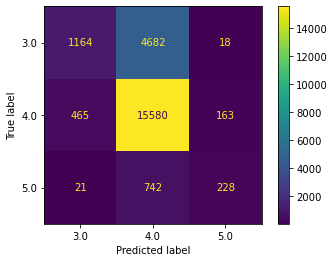

,mean,std
3.0_precision,0.705680,0.024920
3.0_recall,0.198496,0.012962
3.0_f1-score,0.309662,0.016924
4.0_precision,0.741766,0.001546
4.0_recall,0.961253,0.004041
4.0_f1-score,0.837362,0.001919
5.0_precision,0.560085,0.065563
5.0_recall,0.230111,0.038841
5.0_f1-score,0.324705,0.044853
accuracy,0.735897,0.003116


In [8]:
mnb = MultinomialNB(alpha = 1)
linearSVM = svm.LinearSVC(random_state=30027, C=5)
logr = LogisticRegression(solver='sag', max_iter=50, C=1, random_state = 30027)

sclf3 = StackingCVClassifier(classifiers=[mnb, linearSVM, logr], 
                            meta_classifier=CategoricalNB(),
                            cv = 2,
                            random_state=30027)
y_pred3, sclf3_report = cross_val_report(sclf3, X, y)
sclf3_report

## StackingClf2 - 4 Base Classifiers

### Observe DT's performance

DecisionTreeClassifier prediction took 27.65723419189453 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.412651    0.233390      0.298150       0.730093    0.871067   
1       0.456026    0.238501      0.313199       0.732179    0.887107   
2       0.423948    0.223549      0.292737       0.730710    0.882171   
3       0.415584    0.218430      0.286353       0.730710    0.882171   
4       0.461806    0.226962      0.304348       0.733367    0.897594   
5       0.455197    0.216724      0.293642       0.732458    0.895126   
6       0.403785    0.218430      0.283499       0.725691    0.874769   
7       0.427692    0.237201      0.305159       0.731282    0.879704   
8       0.455128    0.241908      0.315907       0.734558    0.888272   
9       0.428571    0.240204      0.307860       0.730093    0.871605   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.794374       0.341463    0.141414      0.200000  0.

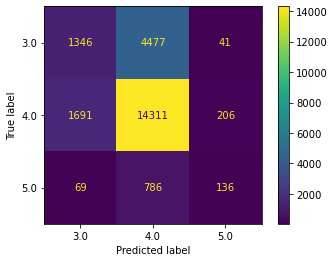

,mean,std
3.0_precision,0.434039,0.021166
3.0_recall,0.229530,0.009855
3.0_f1-score,0.300086,0.011003
4.0_precision,0.731114,0.002397
4.0_recall,0.882959,0.009171
4.0_f1-score,0.799882,0.004884
5.0_precision,0.353119,0.043845
5.0_recall,0.137253,0.029506
5.0_f1-score,0.197112,0.036396
accuracy,0.684777,0.006465


In [9]:
# look at dt's performance
dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 200, random_state = 30027)
y_pred_dt, dt_report = cross_val_report(dt, X, y)
dt_report

DecisionTreeClassifier prediction took 28.367126941680908 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.412979    0.238501      0.302376       0.729632    0.867366   
1       0.450000    0.245315      0.317530       0.733367    0.884022   
2       0.403175    0.216724      0.281909       0.727459    0.876002   
3       0.417178    0.232082      0.298246       0.731266    0.872918   
4       0.459016    0.238908      0.314254       0.735234    0.890808   
5       0.459930    0.225256      0.302405       0.733536    0.893276   
6       0.413793    0.225256      0.291713       0.726807    0.874769   
7       0.425926    0.235495      0.303297       0.731282    0.879704   
8       0.446541    0.241908      0.313812       0.734391    0.885802   
9       0.428135    0.238501      0.306346       0.729758    0.873457   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.792559       0.341463    0.141414      0.200000  0

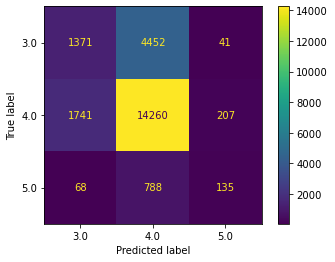

,mean,std
3.0_precision,0.431667,0.020656
3.0_recall,0.233795,0.008895
3.0_f1-score,0.303189,0.010859
4.0_precision,0.731273,0.002875
4.0_recall,0.879812,0.008423
4.0_f1-score,0.798687,0.004918
5.0_precision,0.353311,0.052811
5.0_recall,0.136263,0.025467
5.0_f1-score,0.196137,0.032912
accuracy,0.683606,0.006790


In [10]:
# look at dt's performance
dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 400, random_state = 30027)
y_pred_dt, dt_report = cross_val_report(dt, X, y)
dt_report

### Train StackingClf2

In [11]:
# tune hyperparameters
sclf4 = StackingCVClassifier(classifiers=[mnb, linearSVM, logr, dt], 
                            meta_classifier=CategoricalNB(),
                            cv = 2,
                            random_state=30027)
param_grid = {'linearsvc__C': [1,5], 'multinomialnb__alpha': [0.5, 1], 'logisticregression__C': [0.5, 1, 5], 'decisiontreeclassifier__max_depth': [200, 400], 'decisiontreeclassifier__criterion': ['gini', 'entropy', 'log_loss']}
grid4 = tune_hyperparameter(sclf4, param_grid, X, y, cv=2)
print(max(grid4['mean_test_accuracy']))
grid4.loc[grid4['mean_test_accuracy'] == max(grid4['mean_test_accuracy'])]['params'].values

Fitting 2 folds for each of 72 candidates, totalling 144 fits
[CV] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=200, linearsvc__C=1, logisticregression__C=0.5, multinomialnb__alpha=0.5; total time=  13.5s
[CV] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=200, linearsvc__C=1, logisticregression__C=0.5, multinomialnb__alpha=0.5; total time=  12.7s
[CV] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=200, linearsvc__C=1, logisticregression__C=0.5, multinomialnb__alpha=1; total time=  14.5s
[CV] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=200, linearsvc__C=1, logisticregression__C=0.5, multinomialnb__alpha=1; total time=  14.0s
[CV] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=200, linearsvc__C=1, logisticregression__C=1, multinomialnb__alpha=0.5; total time=  18.3s
[CV] END decisiontreeclassifier__criterion=gini, decisiontreecla

[CV] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=400, linearsvc__C=5, logisticregression__C=5, multinomialnb__alpha=1; total time=  15.1s
[CV] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=200, linearsvc__C=1, logisticregression__C=0.5, multinomialnb__alpha=0.5; total time=   8.8s
[CV] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=200, linearsvc__C=1, logisticregression__C=0.5, multinomialnb__alpha=0.5; total time=   9.2s
[CV] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=200, linearsvc__C=1, logisticregression__C=0.5, multinomialnb__alpha=1; total time=   8.1s
[CV] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=200, linearsvc__C=1, logisticregression__C=0.5, multinomialnb__alpha=1; total time=   8.0s
[CV] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=200, linearsvc__C=1, logisticr

[CV] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=400, linearsvc__C=5, logisticregression__C=5, multinomialnb__alpha=1; total time=  16.9s
[CV] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=400, linearsvc__C=5, logisticregression__C=5, multinomialnb__alpha=1; total time=  15.3s
[CV] END decisiontreeclassifier__criterion=log_loss, decisiontreeclassifier__max_depth=200, linearsvc__C=1, logisticregression__C=0.5, multinomialnb__alpha=0.5; total time=   9.3s
[CV] END decisiontreeclassifier__criterion=log_loss, decisiontreeclassifier__max_depth=200, linearsvc__C=1, logisticregression__C=0.5, multinomialnb__alpha=0.5; total time=   8.1s
[CV] END decisiontreeclassifier__criterion=log_loss, decisiontreeclassifier__max_depth=200, linearsvc__C=1, logisticregression__C=0.5, multinomialnb__alpha=1; total time=   7.9s
[CV] END decisiontreeclassifier__criterion=log_loss, decisiontreeclassifier__max_depth=200, linearsvc__C=1, logi

[CV] END decisiontreeclassifier__criterion=log_loss, decisiontreeclassifier__max_depth=400, linearsvc__C=5, logisticregression__C=5, multinomialnb__alpha=0.5; total time=  13.7s
[CV] END decisiontreeclassifier__criterion=log_loss, decisiontreeclassifier__max_depth=400, linearsvc__C=5, logisticregression__C=5, multinomialnb__alpha=1; total time=  13.3s
[CV] END decisiontreeclassifier__criterion=log_loss, decisiontreeclassifier__max_depth=400, linearsvc__C=5, logisticregression__C=5, multinomialnb__alpha=1; total time=  12.8s
0.7342929703166656


array([{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 200, 'linearsvc__C': 5, 'logisticregression__C': 1, 'multinomialnb__alpha': 1}],
      dtype=object)

StackingCVClassifier prediction took 578.6408429145813 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.707182    0.218058      0.333333       0.743541    0.958667   
1       0.708333    0.202726      0.315232       0.741584    0.964837   
2       0.682081    0.201365      0.310935       0.741305    0.959901   
3       0.680723    0.192833      0.300532       0.739934    0.963603   
4       0.754491    0.215017      0.334661       0.743250    0.967921   
5       0.666667    0.184300      0.288770       0.740229    0.958051   
6       0.724138    0.179181      0.287278       0.739539    0.970389   
7       0.713415    0.199659      0.312000       0.742439    0.969155   
8       0.707602    0.206133      0.319261       0.741445    0.962963   
9       0.707792    0.185690      0.294197       0.739336    0.962963   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.837510       0.500000    0.181818      0.266667  0.73

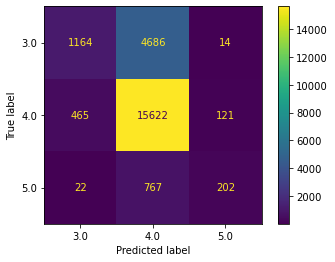

,mean,std
3.0_precision,0.705242,0.024722
3.0_recall,0.198496,0.012962
3.0_f1-score,0.309620,0.016917
4.0_precision,0.741260,0.001497
4.0_recall,0.963845,0.004297
4.0_f1-score,0.838020,0.001874
5.0_precision,0.604271,0.076078
5.0_recall,0.203848,0.036589
5.0_f1-score,0.303082,0.043599
accuracy,0.736591,0.003113


In [12]:
mnb = MultinomialNB(alpha = 1)
linearSVM = svm.LinearSVC(C=5, dual=False,random_state=30027)
logr = LogisticRegression(solver='sag', max_iter=50, random_state = 30027)
dt = DecisionTreeClassifier(criterion = "gini", max_depth = 200, random_state = 30027)

sclf4 = StackingCVClassifier(classifiers=[mnb, linearSVM, logr, dt], 
                            meta_classifier=CategoricalNB(),
                            cv = 2,
                            random_state=30027)
y_pred4, sclf4_report = cross_val_report(sclf4, X, y)
sclf4_report

### Diversity

MultinomialNB prediction took 0.9108009338378906 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.705479    0.175468      0.281037       0.734207    0.967921   
1       0.738462    0.163543      0.267782       0.734136    0.977791   
2       0.750000    0.179181      0.289256       0.737284    0.974707   
3       0.712000    0.151877      0.250352       0.733179    0.974707   
4       0.755396    0.179181      0.289655       0.735253    0.976558   
5       0.666667    0.163823      0.263014       0.735115    0.967304   
6       0.717949    0.143345      0.238976       0.731178    0.976558   
7       0.767442    0.168942      0.276923       0.737135    0.980876   
8       0.739726    0.183986      0.294679       0.737482    0.972840   
9       0.721311    0.149915      0.248237       0.732499    0.975309   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.835019       0.500000    0.121212      0.195122  0.729952  

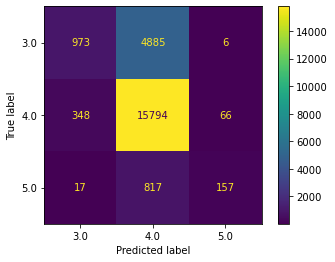

LinearSVC prediction took 6.916563987731934 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.743590    0.197615      0.312248       0.739687    0.962369   
1       0.729730    0.183986      0.293878       0.739972    0.967304   
2       0.740000    0.189420      0.301630       0.738375    0.969772   
3       0.727273    0.177474      0.285322       0.738476    0.968538   
4       0.801370    0.199659      0.319672       0.742011    0.974090   
5       0.694444    0.170648      0.273973       0.737264    0.964220   
6       0.758065    0.160410      0.264789       0.734513    0.972856   
7       0.753425    0.187713      0.300546       0.741071    0.972856   
8       0.760274    0.189097      0.302865       0.737435    0.969136   
9       0.746269    0.170358      0.277393       0.737388    0.965432   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.836461       0.428571    0.181818      0.255319  0.734287  
1   

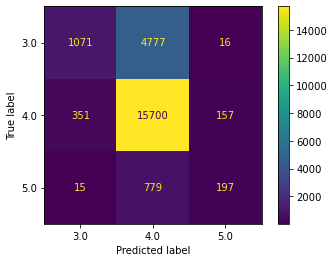

LogisticRegression prediction took 71.63627004623413 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.721854    0.185690      0.295393       0.734295    0.973473   
1       0.717391    0.168654      0.273103       0.732747    0.975941   
2       0.673333    0.172355      0.274457       0.731844    0.969772   
3       0.686131    0.160410      0.260028       0.731787    0.972856   
4       0.780142    0.187713      0.302613       0.736427    0.979025   
5       0.656489    0.146758      0.239888       0.729592    0.970389   
6       0.741667    0.151877      0.252125       0.731371    0.980876   
7       0.728571    0.174061      0.280992       0.734571    0.976558   
8       0.731544    0.185690      0.296196       0.734760    0.974691   
9       0.692857    0.165247      0.266850       0.731787    0.973457   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.837135       0.714286    0.050505      0.094340  0.7334

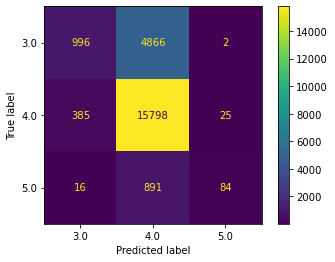

DecisionTreeClassifier prediction took 22.98205280303955 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.398256    0.233390      0.294307       0.728743    0.861814   
1       0.457317    0.255537      0.327869       0.736004    0.884022   
2       0.452599    0.252560      0.324206       0.735917    0.878470   
3       0.433628    0.250853      0.317838       0.736241    0.874769   
4       0.459283    0.240614      0.315789       0.734048    0.887107   
5       0.448718    0.238908      0.311804       0.735490    0.883405   
6       0.424242    0.215017      0.285391       0.727042    0.884022   
7       0.437107    0.237201      0.307522       0.734015    0.885256   
8       0.455414    0.243612      0.317425       0.733504    0.885185   
9       0.429851    0.245315      0.312364       0.730709    0.870988   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.789712       0.347826    0.161616      0.220690  0.

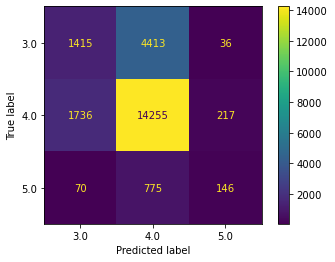

,mnb,svm,logr,dt
mnb,0,528,652,3211
svm,528,0,597,3142
logr,652,597,0,3040
dt,3211,3142,3040,0


In [13]:
clfs = ["mnb", "svm", "logr", "dt"]
preds1 = [cross_val_report(clf, X, y)[0] for clf in [mnb, linearSVM, logr, dt]]
predictions1 = pd.DataFrame({clfs[i]:preds1[i] for i in range(len(clfs))})
differences1 = {clf:[] for clf in clfs}
for clf1 in clfs: 
    for clf2 in clfs: 
        differences1[clf1].append(sum(predictions1[clf1] != predictions1[clf2]))
differences1 = pd.DataFrame(differences1, index = clfs)
differences1.style.background_gradient(cmap='Blues')

## Comparison between SVM, StackingClf1, StackingClf2

LinearSVC prediction took 7.387901782989502 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.743590    0.197615      0.312248       0.739687    0.962369   
1       0.729730    0.183986      0.293878       0.739972    0.967304   
2       0.740000    0.189420      0.301630       0.738375    0.969772   
3       0.727273    0.177474      0.285322       0.738476    0.968538   
4       0.801370    0.199659      0.319672       0.742011    0.974090   
5       0.694444    0.170648      0.273973       0.737264    0.964220   
6       0.758065    0.160410      0.264789       0.734513    0.972856   
7       0.753425    0.187713      0.300546       0.741071    0.972856   
8       0.760274    0.189097      0.302865       0.737435    0.969136   
9       0.746269    0.170358      0.277393       0.737388    0.965432   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.836461       0.428571    0.181818      0.255319  0.734287  
1   

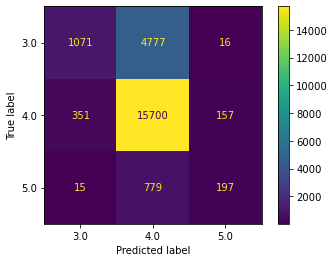

,mean,std
3.0_precision,0.745444,0.027452
3.0_recall,0.182638,0.012669
3.0_f1-score,0.293232,0.017548
4.0_precision,0.738619,0.002165
4.0_recall,0.968657,0.003912
4.0_f1-score,0.838137,0.002178
5.0_precision,0.533414,0.068645
5.0_recall,0.198859,0.041218
5.0_f1-score,0.288069,0.049969
accuracy,0.735724,0.003412


In [15]:
# look at linear SVM performance
linearSVM = svm.LinearSVC(dual=False, C=5, random_state=30027)
y_pred_svm, svm_report = cross_val_report(linearSVM, X, y)
svm_report

       Metrics    SVM  Stacking_Clf_1  Stacking_Clf_2
0  3-precision  0.745           0.706           0.706
1     3-recall  0.183           0.198           0.198
2  4-precision  0.739           0.742           0.741
3     4-recall  0.969           0.961           0.964
4  5-precision  0.533           0.560           0.606
5     5-recall  0.199           0.230           0.201
6     accuracy  0.736           0.736           0.737


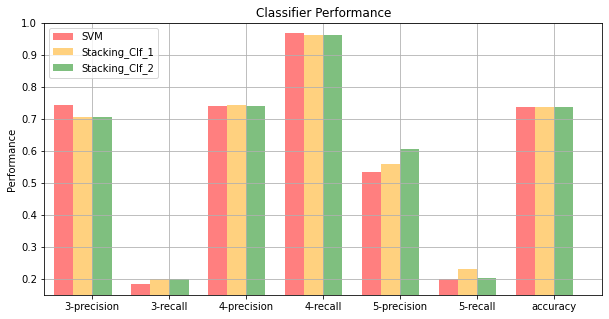

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
performances = {'Metrics': ['3-precision', '3-recall', '4-precision', '4-recall', '5-precision', '5-recall','accuracy'],
                'SVM': [0.745, 0.183, 0.739, 0.969, 0.533, 0.199, 0.736],
                'Stacking_Clf_1': [0.706, 0.198, 0.742, 0.961, 0.56, 0.23, 0.736],
                'Stacking_Clf_2': [0.706, 0.198, 0.741, 0.964, 0.606, 0.201, 0.737]}
performance_df = pd.DataFrame(performances, columns = ['Metrics', 'SVM', 'Stacking_Clf_1', 'Stacking_Clf_2'])
print(performance_df)

pos = list(range(len(performance_df['SVM'])))
width = 0.25

fig, ax = plt.subplots(figsize = (10,5))
plt.bar(pos, performance_df['SVM'], width, alpha=0.5, color='Red')
plt.bar([p+width for p in pos], performance_df['Stacking_Clf_1'], width, alpha=0.5, color='Orange')
plt.bar([p+width*2 for p in pos], performance_df['Stacking_Clf_2'], width, alpha=0.5, color='Green')
ax.set_ylabel('Performance')
ax.set_title('Classifier Performance')
ax.set_xticks([p+1.5*width for p in pos])
ax.set_xticklabels(performance_df['Metrics'])
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0.15, 1])

plt.legend(['SVM', 'Stacking_Clf_1', 'Stacking_Clf_2'], loc='upper left')
plt.grid()
plt.show()

## using different number of feature selection

selected 50 features

StackingCVClassifier prediction took 233.1409101486206 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.707182    0.218058      0.333333       0.743541    0.958667   
1       0.708333    0.202726      0.315232       0.741584    0.964837   
2       0.682081    0.201365      0.310935       0.741305    0.959901   
3       0.680723    0.192833      0.300532       0.739934    0.963603   
4       0.754491    0.215017      0.334661       0.743250    0.967921   
5       0.666667    0.184300      0.288770       0.740229    0.958051   
6       0.724138    0.179181      0.287278       0.739539    0.970389   
7       0.713415    0.199659      0.312000       0.742439    0.969155   
8       0.707602    0.206133      0.319261       0.741445    0.962963   
9       0.707792    0.185690      0.294197       0.739336    0.962963   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.837510       0.500000    0.1818

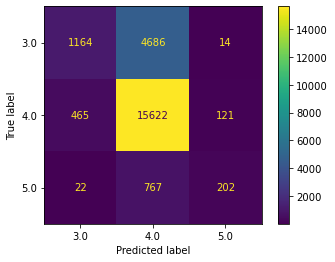

                   mean       std
3.0_precision  0.705242  0.024722
3.0_recall     0.198496  0.012962
3.0_f1-score   0.309620  0.016917
4.0_precision  0.741260  0.001497
4.0_recall     0.963845  0.004297
4.0_f1-score   0.838020  0.001874
5.0_precision  0.604271  0.076078
5.0_recall     0.203848  0.036589
5.0_f1-score   0.303082  0.043599
accuracy       0.736591  0.003113


selected 100 features

StackingCVClassifier prediction took 385.3257508277893 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.695000    0.236797      0.353240       0.746016    0.953115   
1       0.682796    0.216354      0.328590       0.745673    0.956817   
2       0.688525    0.215017      0.327698       0.743295    0.957434   
3       0.640449    0.194539      0.298429       0.739027    0.955583   
4       0.748571    0.223549      0.344284       0.744297    0.966070   
5       0.674157    0.204778      0.314136       0.744019    0.959284   
6       0.701863    0.192

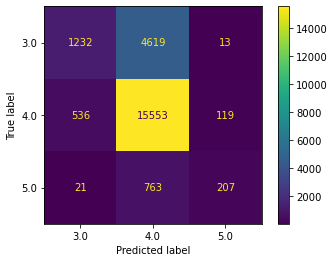

                   mean       std
3.0_precision  0.688786  0.026964
3.0_recall     0.210092  0.014671
3.0_f1-score   0.321779  0.018767
4.0_precision  0.742927  0.002420
4.0_recall     0.959588  0.004818
4.0_f1-score   0.837464  0.002220
5.0_precision  0.613614  0.095080
5.0_recall     0.208899  0.042693
5.0_f1-score   0.310183  0.055049
accuracy       0.736764  0.003936


selected 200 features

StackingCVClassifier prediction took 361.75549960136414 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.683486    0.253833      0.370186       0.748660    0.948180   
1       0.663366    0.228279      0.339670       0.746854    0.951882   
2       0.680000    0.232082      0.346056       0.744231    0.954966   
3       0.629032    0.199659      0.303109       0.739904    0.949414   
4       0.740933    0.244027      0.367137       0.748560    0.962369   
5       0.666667    0.218430      0.329049       0.747099    0.953115   
6       0.684524    0.19

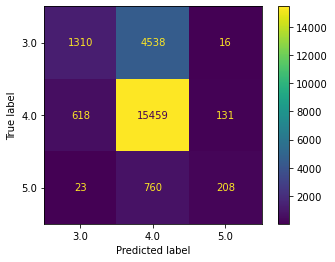

                   mean       std
3.0_precision  0.671332  0.030980
3.0_recall     0.223394  0.018635
3.0_f1-score   0.334981  0.023551
4.0_precision  0.744770  0.003226
4.0_recall     0.953788  0.005619
4.0_f1-score   0.836410  0.003229
5.0_precision  0.588581  0.085596
5.0_recall     0.209960  0.047321
5.0_f1-score   0.307266  0.057452
accuracy       0.736114  0.005201


selected 300 features

StackingCVClassifier prediction took 613.6839120388031 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.644898    0.269165      0.379808       0.750992    0.933991   
1       0.674757    0.236797      0.350567       0.748425    0.952498   
2       0.679245    0.245734      0.360902       0.746854    0.951882   
3       0.611111    0.206485      0.308673       0.738462    0.947563   
4       0.703349    0.250853      0.369811       0.749396    0.957434   
5       0.643564    0.221843      0.329949       0.744108    0.954349   
6       0.670330    0.208

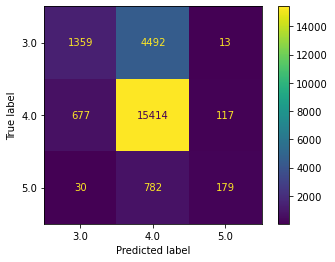

                   mean       std
3.0_precision  0.657760  0.025477
3.0_recall     0.231749  0.020133
3.0_f1-score   0.342390  0.023575
4.0_precision  0.745094  0.004144
4.0_recall     0.951012  0.007097
4.0_f1-score   0.835535  0.003473
5.0_precision  0.596912  0.120292
5.0_recall     0.180667  0.028572
5.0_f1-score   0.275303  0.039705
accuracy       0.735030  0.005453




In [18]:
from sklearn.naive_bayes import MultinomialNB, CategoricalNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import StackingCVClassifier

mnb = MultinomialNB(alpha = 1)
linearSVM = svm.LinearSVC(C=5, dual = False, random_state = 30027)
logr = LogisticRegression(solver='sag', max_iter=50, random_state = 30027)
dt = DecisionTreeClassifier(max_depth = 200, random_state = 30027)
sclf = StackingCVClassifier(classifiers=[mnb, linearSVM, logr, dt], 
                            meta_classifier=CategoricalNB(),
                            cv = 2,
                            random_state=30027)

nums = ['50', '100', '200', '300']
train_dfs = [pd.read_csv(DATASET_DIR + "train_df_"+num+".csv", keep_default_na=False) for num in nums]

for i in range(4): 
    print("================================================================================")
    print(f'selected {nums[i]} features\n')
    train_df = train_dfs[i]
    X_train = train_df.iloc[:,:-1]
    y_train = train_df.iloc[:,-1]
    _, report = cross_val_report(sclf, X_train, y_train)
    print(report)
    print('\n================================================================================\n')